In [1]:
# -*- coding: utf-8 -*-

"""
@Time        : 7/1/2023
@Author      : purmortal
@File        : plot_gist_aggregation
@Description : 
"""
import sys

from utils import  *
import gist_plot as gist_plot
import gist_mass_fraction_plot as gist_mass_fraction_plot
from weights_loader import weights

import matplotlib

from multiprocessing import Pool
from astropy.io import fits
from astropy.table import Table, vstack
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from scipy.stats import pearsonr
from spectres import spectres
import numpy as np

import os


# Define your own paths
fig_path = './figs/L0x0p1' # path to save figs
cube_gist_path = '/Users/selilium/galcraft_test/test_gistplot/regularization/L0p1/'
cube_gist_run = 'resultsRevisedMEr1'
fraction_type = 'mass fraction'


# To Michael:
# For your case, the below path should work
#fig_path = './fig/' # path to save figs
#cube_gist_path = '/ourdisk/hpc/galacticos/data/dont_archive/datacubes/galcraft_test/' # path of gist products
#cube_gist_run = 'resultsRevisedREmdeg4' # folder name of GIST products
#fraction_type = 'mass fraction' # Depending on whether the SSP spectra is normalized to one solar mass or one solar luminosity



In [2]:
fig_path_run = fig_path  + cube_gist_run
print (fig_path, cube_gist_run, fig_path_run)
if os.path.exists(fig_path_run) == False:
    os.mkdir(fig_path_run)

cube_gist_run_path = cube_gist_path + cube_gist_run + '/'
filename = cube_gist_run_path + cube_gist_run

cmap_color = 'sauron'

./figs/L0x0p1 resultsRevisedMEr1 ./figs/L0x0p1resultsRevisedMEr1


# Weighted average

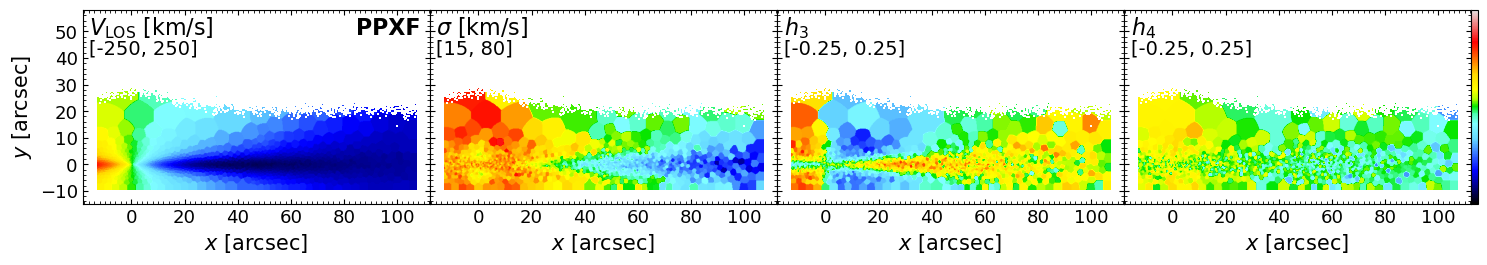

In [3]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# KIN
vminmax = np.array([[[-250, 250], [15, 80], [-0.25, 0.25], [-0.25, 0.25]]])
result_l = gist_plot.read_results_kin(filename, [''])
fig_kin = gist_plot.plot_kin(filename, ['PPXF'], result_l=result_l, vminmax=vminmax,
                use_vminmax=[True], residual=[False], cmap_l=[cmap_color] * len(result_l))
fig_kin.savefig(fig_path_run + '/test_kin_' + cube_gist_run + '.pdf', dpi=500, pad_inches=0.02, bbox_inches='tight')

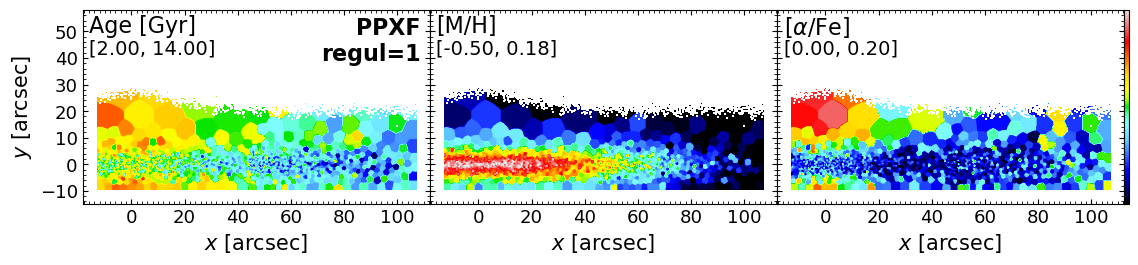

In [4]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# SFH
sfh_header = fits.open(filename + '_sfh.fits')[1].header
if sfh_header['HIERARCH REGUL_ERR'] == None:
    regul = 0
else:
    regul = 1 / sfh_header['HIERARCH REGUL_ERR']


vminmax = np.array([[[2, 14], [-0.5, 0.18], [0, 0.2]]])
result_l = gist_plot.read_results_sfh(filename, flag=['SFH'], suffix=[''])
fig_sfh = gist_plot.plot_sfh(filename, ['PPXF\nregul=' + str(int(regul))],
                             result_l=result_l, vminmax=vminmax, use_vminmax=[True],
                             residual=[False], cmap_l=[cmap_color] * len(result_l))
res_age_array = np.unique(result_l[-1][:, 0])
res_metal_array = np.unique(result_l[-1][:, 1])
res_alpha_array = np.unique(result_l[-1][:, 2])
fig_sfh.savefig(fig_path_run + '/test_sfh_' + cube_gist_run + '.pdf', dpi=500, pad_inches=0.02, bbox_inches='tight')

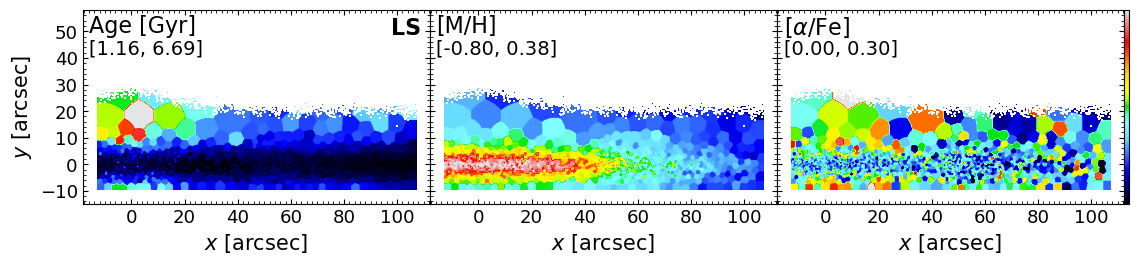

In [5]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# LS
if os.path.exists(filename + '_ls_AdapRes.fits'):
    result_l = gist_plot.read_results_sfh(filename, flag=['LS'], suffix=[''])
    fig_ls = gist_plot.plot_sfh(filename, ['LS'], result_l=result_l, use_vminmax=[False], cmap_l=[cmap_color] * len(result_l))
    fig_ls.savefig(fig_path_run + '/test_sfh_ls_' + cube_gist_run + '.pdf', dpi=500, pad_inches=0.02, bbox_inches='tight')

# Global Mass distribution

In [6]:
ppxf_weights = weights(cube_gist_path, cube_gist_run, mode='ppxf', fraction_type=fraction_type)
true_weights = weights(cube_gist_path, cube_gist_run, mode='true', fraction_type=fraction_type)

# To Michael:
# ppxf_weights are the weights that obtained from PPXF spectral fitting
# true_weights here are the weights that I calculated by myself as the "true" value 
# in the GalCraft paper to compare with PPXF weights, you can change it to your nGIST
# results by changing the 'cube_gist_path' and 'cube_gist_run', mode='ppxf' keywords 

/Users/selilium/galcraft_test/test_gistplot/weights_loader.py:236: RuntimeWarning: divide by zero encountered in log10
  log_wdf = np.log10(np.nansum(cumulative_weights_2d, axis=-1) / grid_area_2d[:, :, 0])
/Users/selilium/galcraft_test/test_gistplot/weights_loader.py:237: RuntimeWarning: divide by zero encountered in log10
  log_wdf_nuclear = np.log10(np.nansum(weights_nuclear, axis=-1) / grid_area_2d[:, :, 0])
/Users/selilium/galcraft_test/test_gistplot/weights_loader.py:238: RuntimeWarning: divide by zero encountered in log10
  log_wdf_bulge = np.log10(np.nansum(weights_bulge, axis=-1) / grid_area_2d[:, :, 0])
/Users/selilium/galcraft_test/test_gistplot/weights_loader.py:239: RuntimeWarning: divide by zero encountered in log10
  log_wdf_thin = np.log10(np.nansum(weights_thin, axis=-1) / grid_area_2d[:, :, 0])
/Users/selilium/galcraft_test/test_gistplot/weights_loader.py:240: RuntimeWarning: divide by zero encountered in log10
  log_wdf_thick = np.log10(np.nansum(weights_thick, axis=

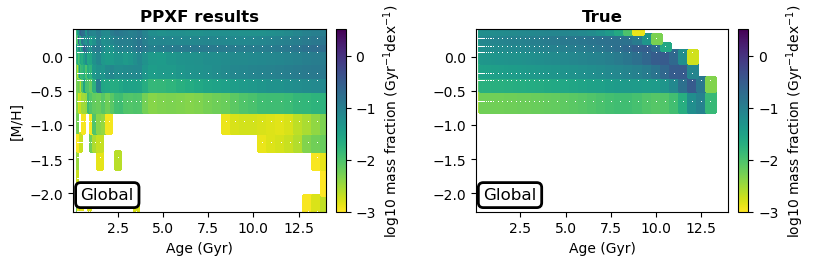

In [7]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# mass/light-fraction distribution



fig_mft = gist_mass_fraction_plot.plot_weights_2d_cases([[ppxf_weights.log_wdf], [true_weights.log_wdf]],
                                [ppxf_weights.age_grid_2d[:, :, 0], true_weights.age_grid_2d[:, :, 0]],
                                [ppxf_weights.metal_grid_2d[:, :, 0], true_weights.metal_grid_2d[:, :, 0]],
                                ['Global'], ['PPXF results', 'True'], vmin=-3, vmax=0.5,
                                axes_pad=[1.3, 0.3], cbar_mode='each', cbar_location='right', cbar_pad=0.1,
                                cb_label=r'log10 %s ($\rm Gyr^{-1} dex^{-1}$)' % fraction_type, cmap='viridis_r', nodots=False)
fig_mft.tight_layout(pad=0.15)
fig_mft.savefig(fig_path_run + '/2dmfd_global_massperGyrperdex_linage_metal_' + cube_gist_run + '.pdf', dpi=500)

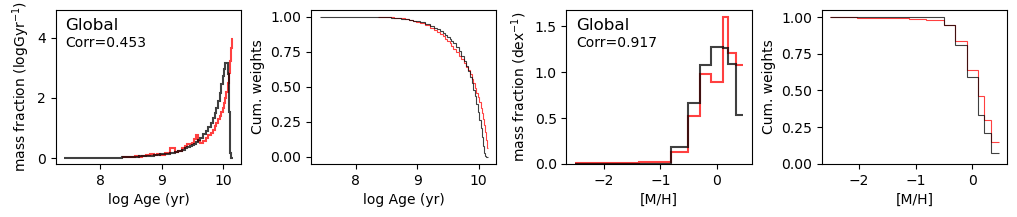

In [8]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Total star formation history and metallicity distribution perlogage, logage
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.cumulative_weights_2d],
                                          [true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb_log[:, 0, 0], true_weights.yyb_log[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['logage_stairs', 'logage_cum', 'metal_stairs', 'metal_cum'],
                            perbinsize_list=['log', None, True, None],
                            logmass_list=[False, False, False, False],
                            show_corr_list=[True, False, True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Global'],
                            direction='col', fraction_type=fraction_type
                           )
fig.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.7)
fig.savefig(fig_path_run + '/1dmfd_global_weightsperlogGyr_logage_metal_' + cube_gist_run + '.pdf', dpi=500)

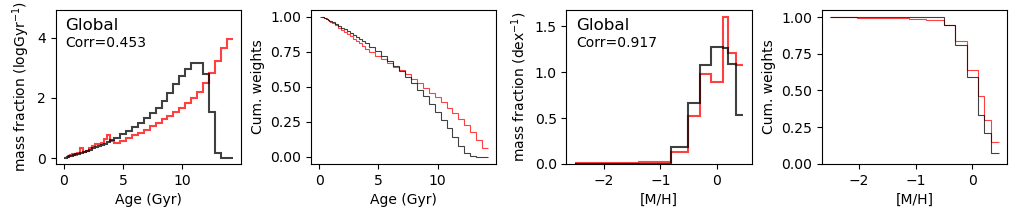

In [9]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Total star formation history and metallicity distribution perlogage
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.cumulative_weights_2d],
                                          [true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb_log[:, 0, 0], true_weights.yyb_log[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['age_stairs', 'age_cum', 'metal_stairs', 'metal_cum'],
                            perbinsize_list=['log', None, True, None],
                            logmass_list=[False, False, False, False],
                            show_corr_list=[True, False, True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Global'],
                            direction='col', fraction_type=fraction_type
                           )
fig.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.7)
fig.savefig(fig_path_run + '/1dmfd_global_weightsperlogGyr_linage_metal_' + cube_gist_run + '.pdf', dpi=500)

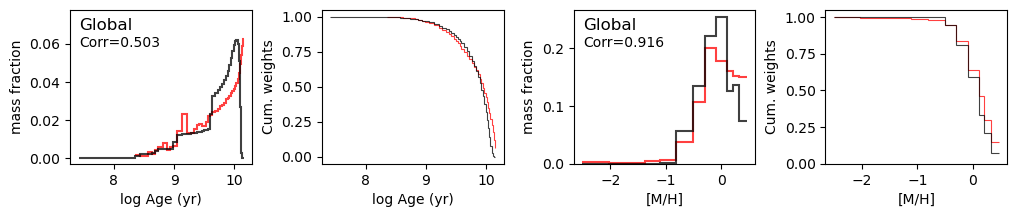

In [10]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Total star formation history and metallicity distribution in log age space
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.cumulative_weights_2d],
                                          [true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb[:, 0, 0], true_weights.yyb[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['logage_stairs', 'logage_cum', 'metal_stairs', 'metal_cum'],
                            perbinsize_list=[False, None, False, None],
                            logmass_list=[False, False, False, False],
                            show_corr_list=[True, False, True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Global'],
                            direction='col', fraction_type=fraction_type
                           )
fig.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.7)
fig.savefig(fig_path_run + '/1dmfd_global_weights_logage_metal_' + cube_gist_run + '.pdf', dpi=500)

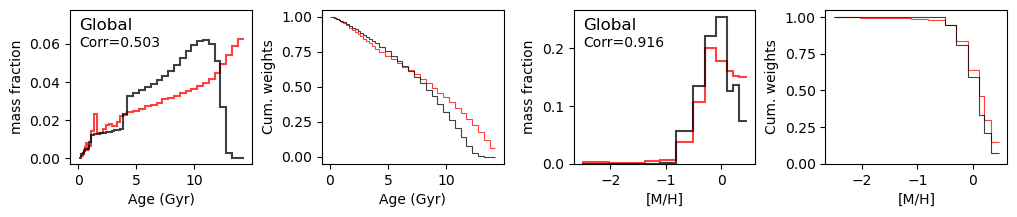

In [11]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Total star formation history and metallicity distribution
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.cumulative_weights_2d],
                                          [true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb[:, 0, 0], true_weights.yyb[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['age_stairs', 'age_cum', 'metal_stairs', 'metal_cum'],
                            perbinsize_list=[False, None, False, None],
                            logmass_list=[False, False, False, False],
                            show_corr_list=[True, False, True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Global'],
                            direction='col', fraction_type=fraction_type
                           )
fig.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.7)
fig.savefig(fig_path_run + '/1dmfd_global_weights_linage_metal_' + cube_gist_run + '.pdf', dpi=500)

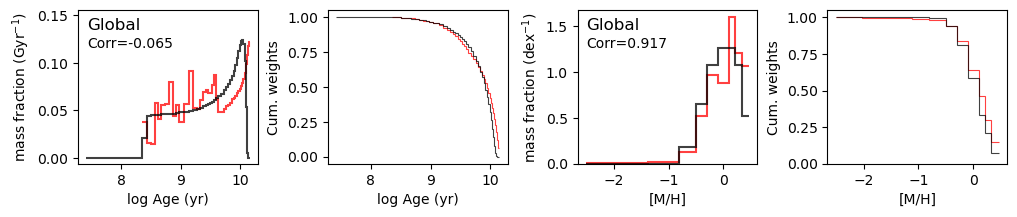

In [12]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Plot same figure without dividing binsize
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.cumulative_weights_2d],
                                          [true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb[:, 0, 0], true_weights.yyb[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['logage_stairs', 'logage_cum', 'metal_stairs', 'metal_cum'],
                            perbinsize_list=[True, None, True, None],
                            logmass_list=[False, False, False, False],
                            show_corr_list=[True, False, True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Global'],
                            direction='col', fraction_type=fraction_type
                           )
fig.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.7)
fig.savefig(fig_path_run + '/1dmfd_global_weightsperGyr_logage_metal_' + cube_gist_run + '.pdf', dpi=500)

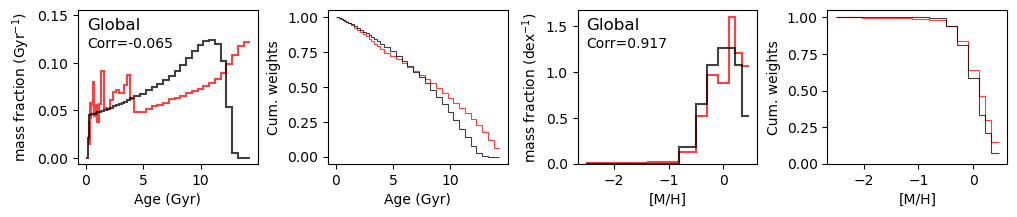

In [13]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Plot same figure without dividing binsize
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.cumulative_weights_2d],
                                          [true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb[:, 0, 0], true_weights.yyb[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['age_stairs', 'age_cum', 'metal_stairs', 'metal_cum'],
                            perbinsize_list=[True, None, True, None],
                            logmass_list=[False, False, False, False],
                            show_corr_list=[True, False, True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Global'],
                            direction='col', fraction_type=fraction_type
                           )
fig.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.7)
fig.savefig(fig_path_run + '/1dmfd_global_weightsperGyr_linage_metal_' + cube_gist_run + '.pdf', dpi=500)

# Mass distribution of different components

/var/folders/2_/44rr6rk915g7v4b1dstqddh40000gn/T/ipykernel_1835/3790648592.py:11: RuntimeWarning: divide by zero encountered in log
  ax.imshow(np.flip(np.log(ppxf_weights.flux_reshape), axis=0), cmap='gist_yarg', vmax=np.nanpercentile(np.log(ppxf_weights.flux_reshape), 99),


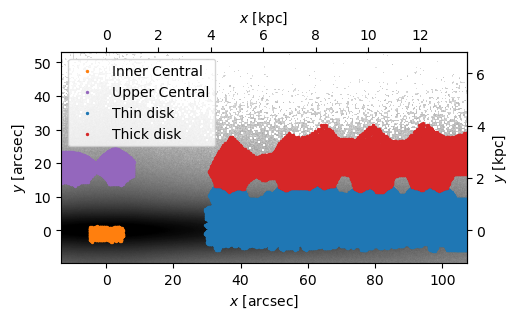

In [14]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Plot components distribution

def arcsec2dist(arc):
    return 26500 * arc / 3600 * np.pi / 180

def dist2arcsec(dist):
    return dist * 180 / np.pi * 3600 / 26500

fig, ax = plt.subplots(1, 1, figsize=[6, 3])
ax.imshow(np.flip(np.log(ppxf_weights.flux_reshape), axis=0), cmap='gist_yarg', vmax=np.nanpercentile(np.log(ppxf_weights.flux_reshape), 99),
          extent=[np.min(ppxf_weights.results_table['X']) - ppxf_weights.pixelsize / 2, np.max(ppxf_weights.results_table['X']) + ppxf_weights.pixelsize / 2,
                  np.min(ppxf_weights.results_table['Y']) - ppxf_weights.pixelsize / 2, np.max(ppxf_weights.results_table['Y']) + ppxf_weights.pixelsize / 2])
ax.scatter(ppxf_weights.results_nuclear['X'], ppxf_weights.results_nuclear['Y'], s=2, c='tab:orange', label='Inner Central')
ax.scatter(ppxf_weights.results_bulge['X'], ppxf_weights.results_bulge['Y'], s=2, c='tab:purple', label='Upper Central')
ax.scatter(ppxf_weights.results_thin['X'], ppxf_weights.results_thin['Y'], s=2, c='tab:blue', label='Thin disk')
ax.scatter(ppxf_weights.results_thick['X'], ppxf_weights.results_thick['Y'], s=2, c='tab:red', label='Thick disk')
ax.set_xlabel(r'$x$ [arcsec]')
ax.set_ylabel(r'$y$ [arcsec]')
secaxx = ax.secondary_xaxis('top', functions=(arcsec2dist, dist2arcsec))
secaxx.set_xlabel(r'$x$ [kpc]')
secaxy = ax.secondary_yaxis('right', functions=(arcsec2dist, dist2arcsec))
secaxy.set_ylabel(r'$y$ [kpc]')
plt.legend()
plt.tight_layout(pad=0.01)
plt.savefig(fig_path_run + '/galaxy_components_' + cube_gist_run + '.png', dpi=500)

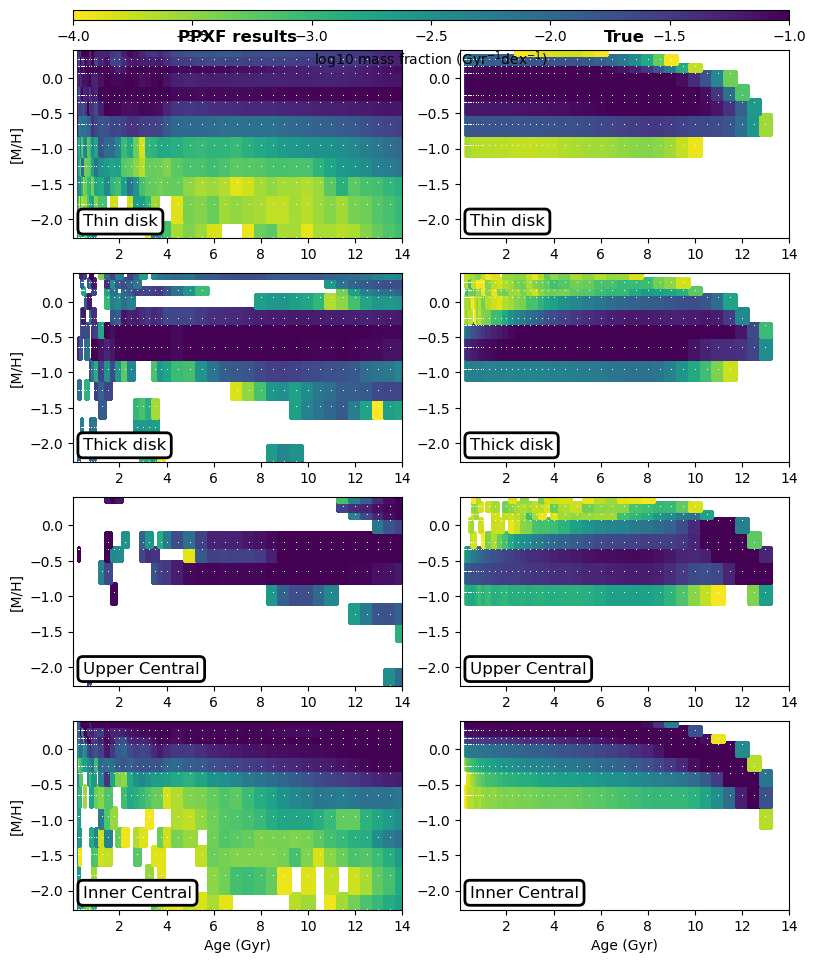

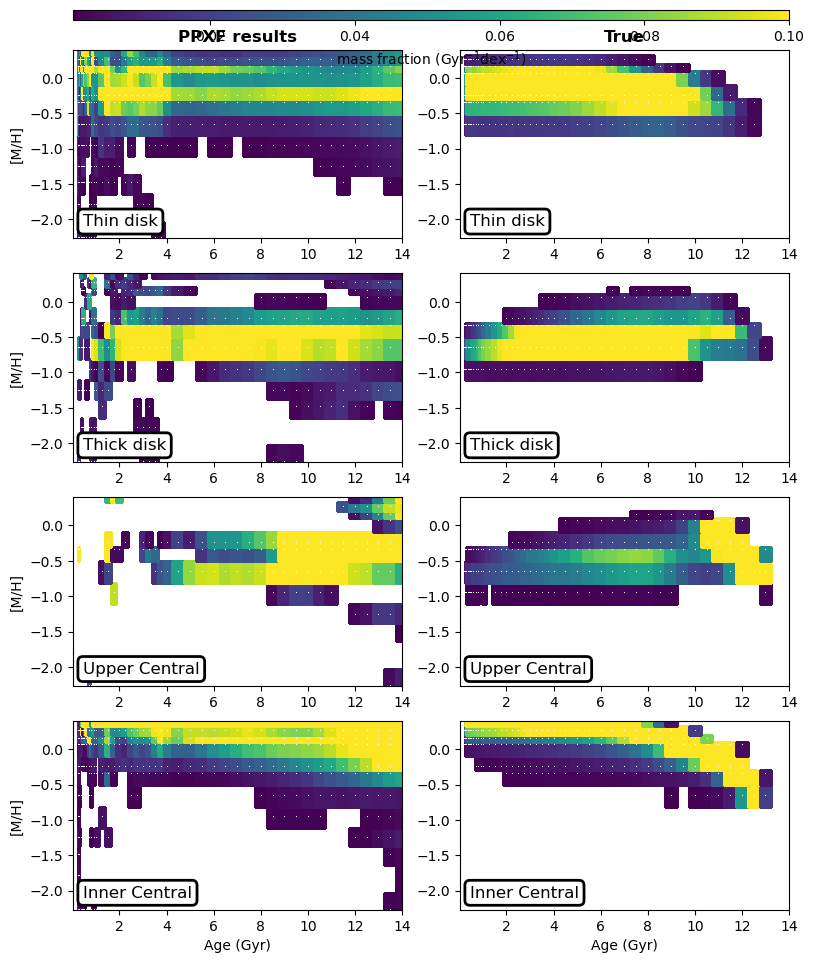

In [15]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
fig = gist_mass_fraction_plot.plot_weights_2d_cases([[ppxf_weights.log_wdf_thin, ppxf_weights.log_wdf_thick, ppxf_weights.log_wdf_bulge, ppxf_weights.log_wdf_nuclear],
                             [true_weights.log_wdf_thin, true_weights.log_wdf_thick, true_weights.log_wdf_bulge, true_weights.log_wdf_nuclear]],
                            [ppxf_weights.age_grid_2d[:, :, 0], true_weights.age_grid_2d[:, :, 0]],
                            [ppxf_weights.metal_grid_2d[:, :, 0], true_weights.metal_grid_2d[:, :, 0]],
                            ['Thin disk', 'Thick disk', 'Upper Central', 'Inner Central'], ['PPXF results', 'True'], vmin= -4, vmax= -1, 
                            axes_pad=(0.58, 0.35), cbar_mode='single', cbar_location='top', cbar_pad=0.3,
                            cb_label=r'log10 %s ($\rm Gyr^{-1} dex^{-1}$)' % fraction_type, cmap='viridis_r', nodots=False)
fig.subplots_adjust(left=0.085, bottom=0.05, right=0.980, top=0.95)
fig.savefig(fig_path_run + '/2dmfd_components_logweightsperGyrperdex_linage_metal_' + cube_gist_run + '.pdf', dpi=500)

fig = gist_mass_fraction_plot.plot_weights_2d_cases([[ppxf_weights.wdf_thin, ppxf_weights.wdf_thick, ppxf_weights.wdf_bulge, ppxf_weights.wdf_nuclear],
                             [true_weights.wdf_thin, true_weights.wdf_thick, true_weights.wdf_bulge, true_weights.wdf_nuclear]],
                            [ppxf_weights.age_grid_2d[:, :, 0], true_weights.age_grid_2d[:, :, 0]],
                            [ppxf_weights.metal_grid_2d[:, :, 0], true_weights.metal_grid_2d[:, :, 0]],
                            ['Thin disk', 'Thick disk', 'Upper Central', 'Inner Central'], ['PPXF results', 'True'], vmin=0.001, vmax=0.1,
                            axes_pad=(0.58, 0.35), cbar_mode='single', cbar_location='top', cbar_pad=0.3,
                            cb_label=r'%s ($\rm Gyr^{-1} dex^{-1}$)' % fraction_type, cmap='viridis', nodots=False)
fig.subplots_adjust(left=0.085, bottom=0.05, right=0.980, top=0.95)
fig.savefig(fig_path_run + '/2dmfd_components_weightsperGyrperdex_linage_metal_' + cube_gist_run + '.pdf', dpi=500)

In [16]:
print("wdf_thin:", ppxf_weights.wdf_thin.shape)
print("age grid:", ppxf_weights.age_grid_2d.shape)
print("metal grid:", ppxf_weights.metal_grid_2d.shape)


wdf_thin: (43, 12)
age grid: (43, 12, 2)
metal grid: (43, 12, 2)


In [17]:
for attr in dir(ppxf_weights):
    try:
        arr = getattr(ppxf_weights, attr)
        if isinstance(arr, np.ndarray):
            print(attr, arr.shape)
    except:
        pass


age_grid_2d (43, 12, 2)
alpha_grid_2d (43, 12, 2)
bin_areas (28,)
bin_edges (29,)
cumulative_weights_2d (43, 12, 2)
flux_reshape (315, 603)
grid_area_2d (43, 12, 2)
grid_area_2d_log (43, 12, 2)
log_wdf (43, 12)
log_wdf_bulge (43, 12)
log_wdf_innerthick (43, 12)
log_wdf_innerthin (43, 12)
log_wdf_nuclear (43, 12)
log_wdf_outerthick (43, 12)
log_wdf_outerthin (43, 12)
log_wdf_thick (43, 12)
log_wdf_thin (43, 12)
mean_alpha_grids_bulge (43, 12)
mean_alpha_grids_nuclear (43, 12)
mean_alpha_grids_thick (43, 12)
mean_alpha_grids_thin (43, 12)
metal (12,)
metal_bulge (12,)
metal_grid_2d (43, 12, 2)
metal_nuclear (12,)
metal_thick (12,)
metal_thin (12,)
original_weights_values (1382, 1032)
reg_dim (3,)
statistic_sfh (28,)
statistic_sfh_bulge (28,)
statistic_sfh_innerthick (28,)
statistic_sfh_innerthin (28,)
statistic_sfh_nuclear (28,)
statistic_sfh_outerthick (28,)
statistic_sfh_outerthin (28,)
statistic_sfh_thick (28,)
statistic_sfh_thin (28,)
wdf (43, 12)
wdf_bulge (43, 12)
wdf_innerthick (4

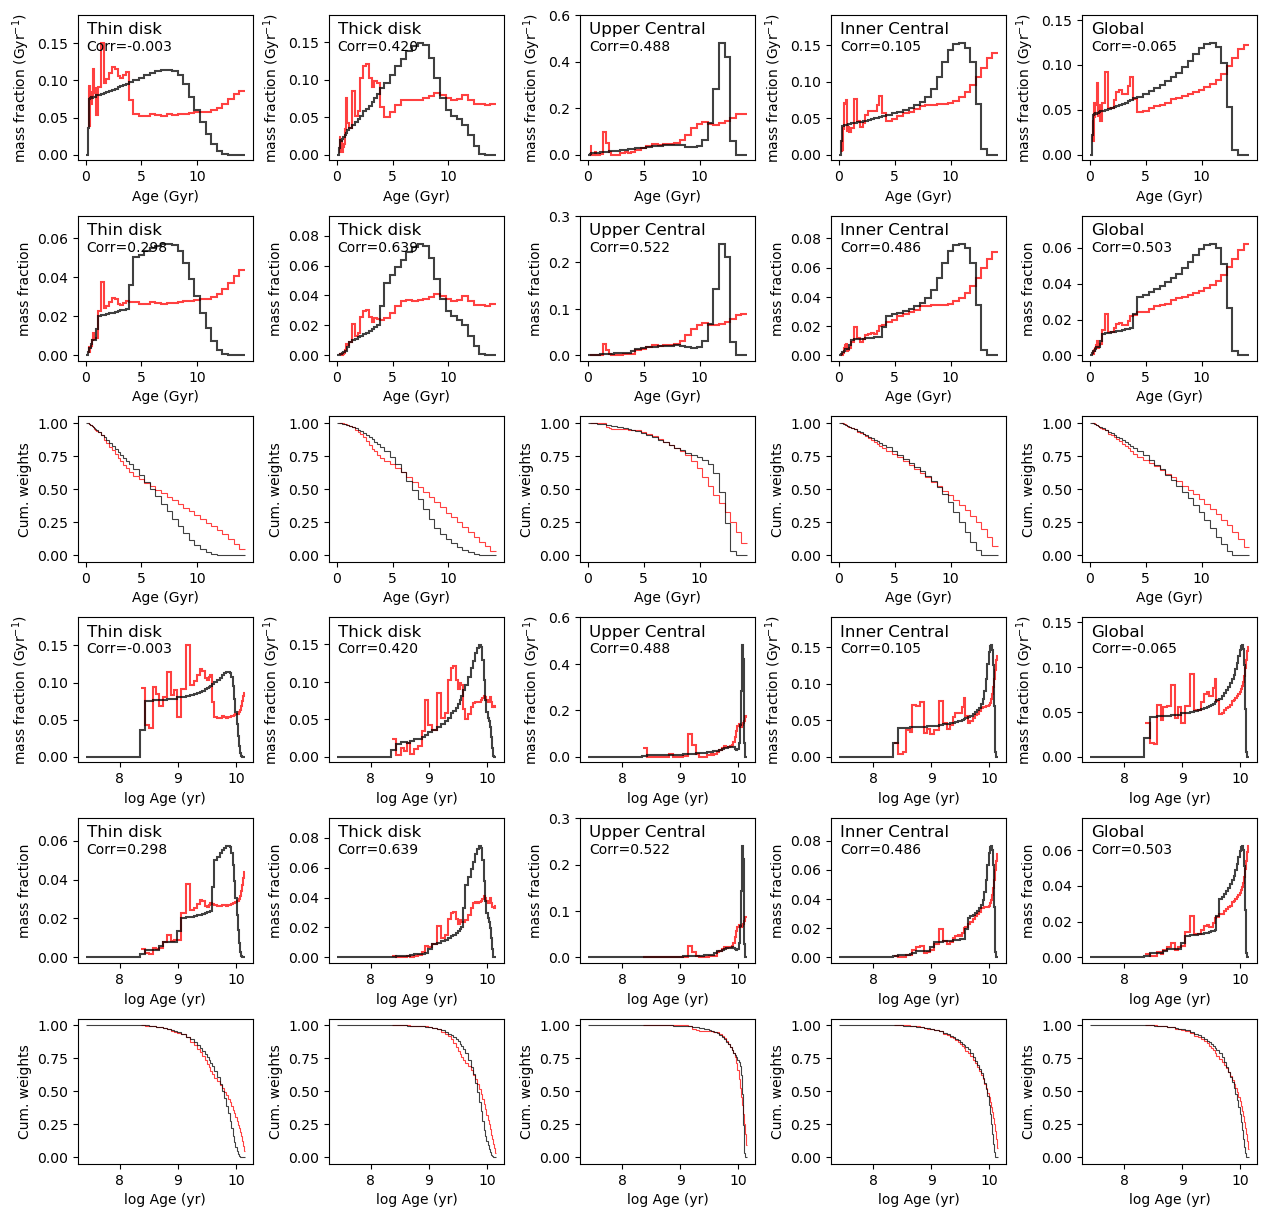

In [18]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# star formation history in log ang linear age space with cumulative figures
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.weights_thin, ppxf_weights.weights_thick, ppxf_weights.weights_bulge, ppxf_weights.weights_nuclear, ppxf_weights.cumulative_weights_2d],
                                          [true_weights.weights_thin, true_weights.weights_thick, true_weights.weights_bulge, true_weights.weights_nuclear, true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb[:, 0, 0], true_weights.yyb[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['age_stairs', 'age_stairs', 'age_cum', 'logage_stairs', 'logage_stairs', 'logage_cum'],
                            perbinsize_list=[True, False, None, True, False, None],
                            logmass_list=[False, False, False, False, False, False],
                            show_corr_list=[True, True, False, True, True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Thin disk', 'Thick disk', 'Upper Central', 'Inner Central', 'Global'],
                            direction='row', fraction_type=fraction_type
                           )
plt.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.5)
plt.savefig(fig_path_run + '/1dmfd_components_weightsmassperGyr_linlogage_' + cube_gist_run + '.pdf', dpi=500)


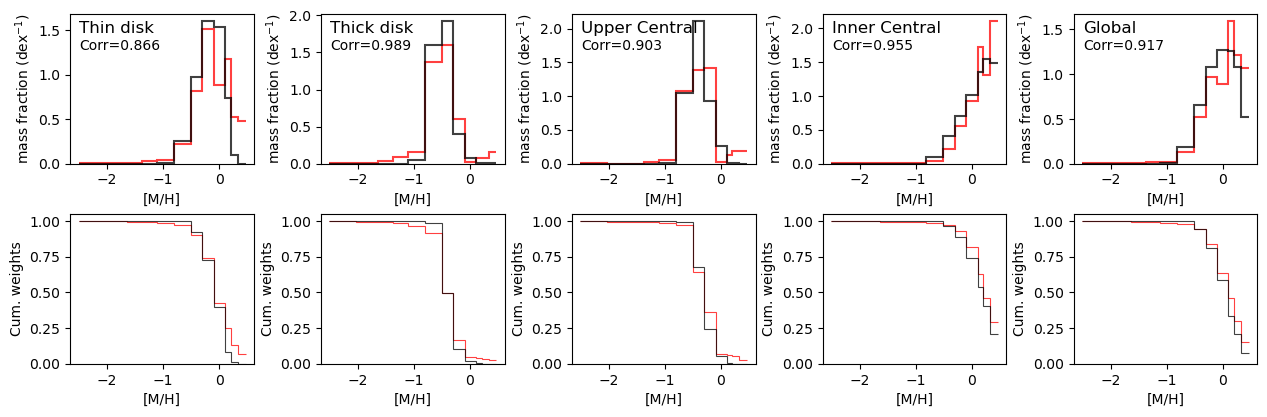

In [19]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# 1d metallicity distribution and cumulative distribution
fig = gist_mass_fraction_plot.plot_weights_1d_cases(weights_list=[[ppxf_weights.weights_thin, ppxf_weights.weights_thick, ppxf_weights.weights_bulge, ppxf_weights.weights_nuclear, ppxf_weights.cumulative_weights_2d],
                                          [true_weights.weights_thin, true_weights.weights_thick, true_weights.weights_bulge, true_weights.weights_nuclear, true_weights.cumulative_weights_2d]],
                            age_grid_list=[ppxf_weights.age_grid_2d[:, 0, 0], true_weights.age_grid_2d[:, 0, 0]],
                            metal_grid_list=[ppxf_weights.metal_grid_2d[0, :, 0], true_weights.metal_grid_2d[0, :, 0]],
                            age_gridsize_list=[ppxf_weights.yyb[:, 0, 0], true_weights.yyb[:, 0, 0]],
                            metal_gridsize_list=[ppxf_weights.xxb[0, :, 0], true_weights.xxb[0, :, 0]],
                            age_gridborder_list=[ppxf_weights.yb, true_weights.yb],
                            metal_gridborder_list=[ppxf_weights.xb, true_weights.xb],
                            plot_type_list=['metal_stairs', 'metal_cum'],
                            perbinsize_list=[True, False],
                            logmass_list=[False, False],
                            show_corr_list=[True, False],
                            color_list=['red', 'black'],
                            label_list=['PPXF results', 'True'],
                            text_list=['Thin disk', 'Thick disk', 'Upper Central', 'Inner Central', 'Global'],
                            direction='row', fraction_type=fraction_type
                           )
fig.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.5)
fig.savefig(fig_path_run + '/1dmfd_components_weightsperdex_metal_' + cube_gist_run + '.pdf', dpi=500)

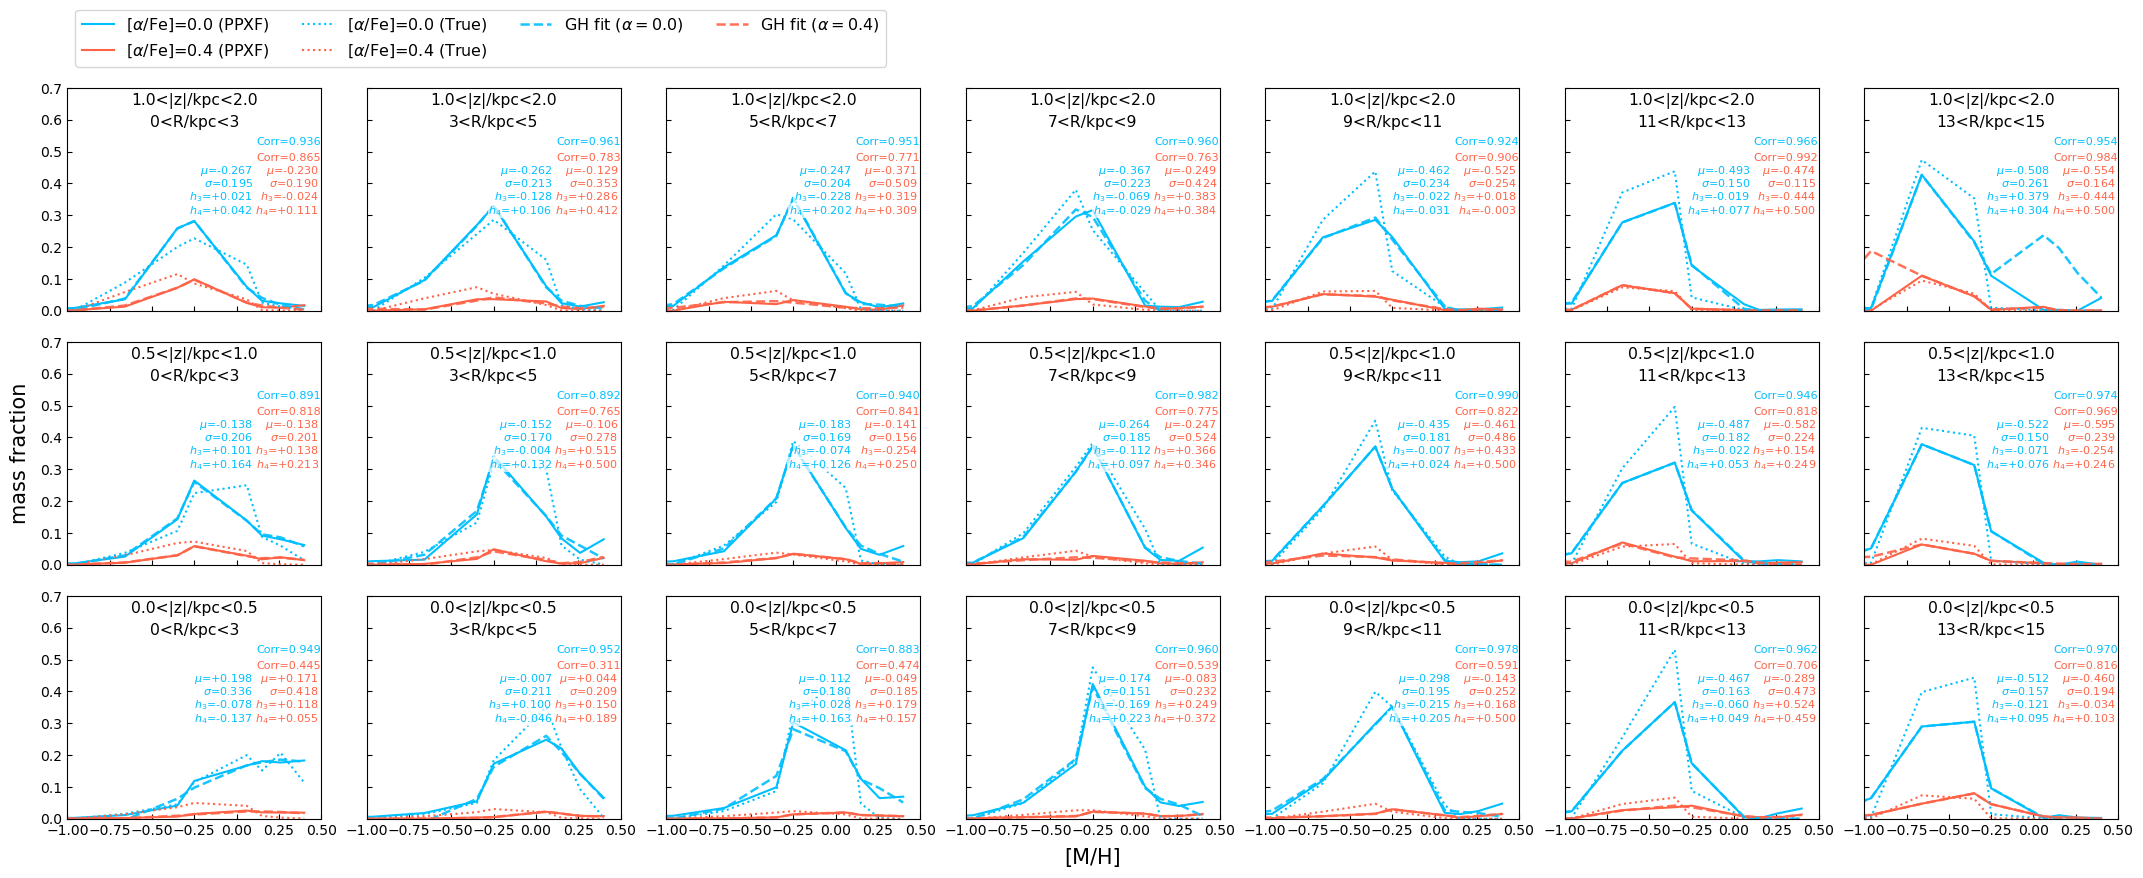

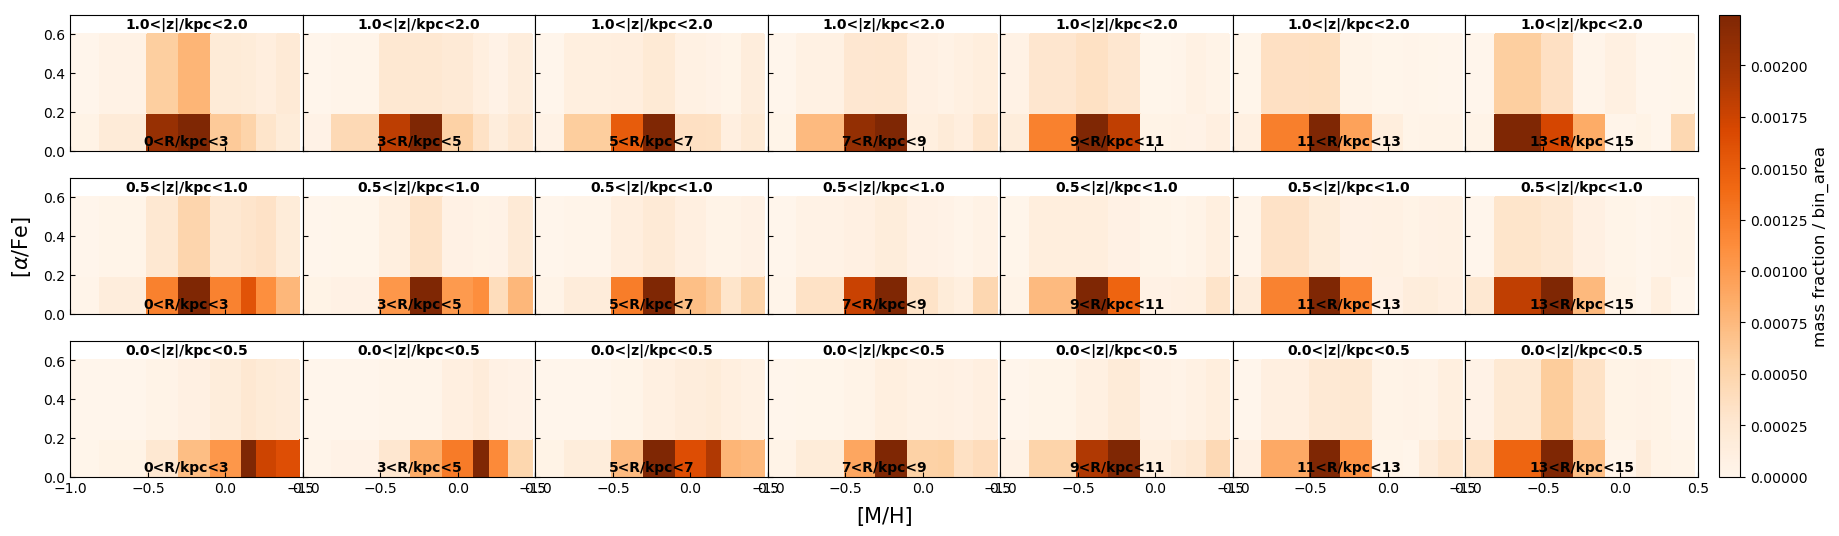

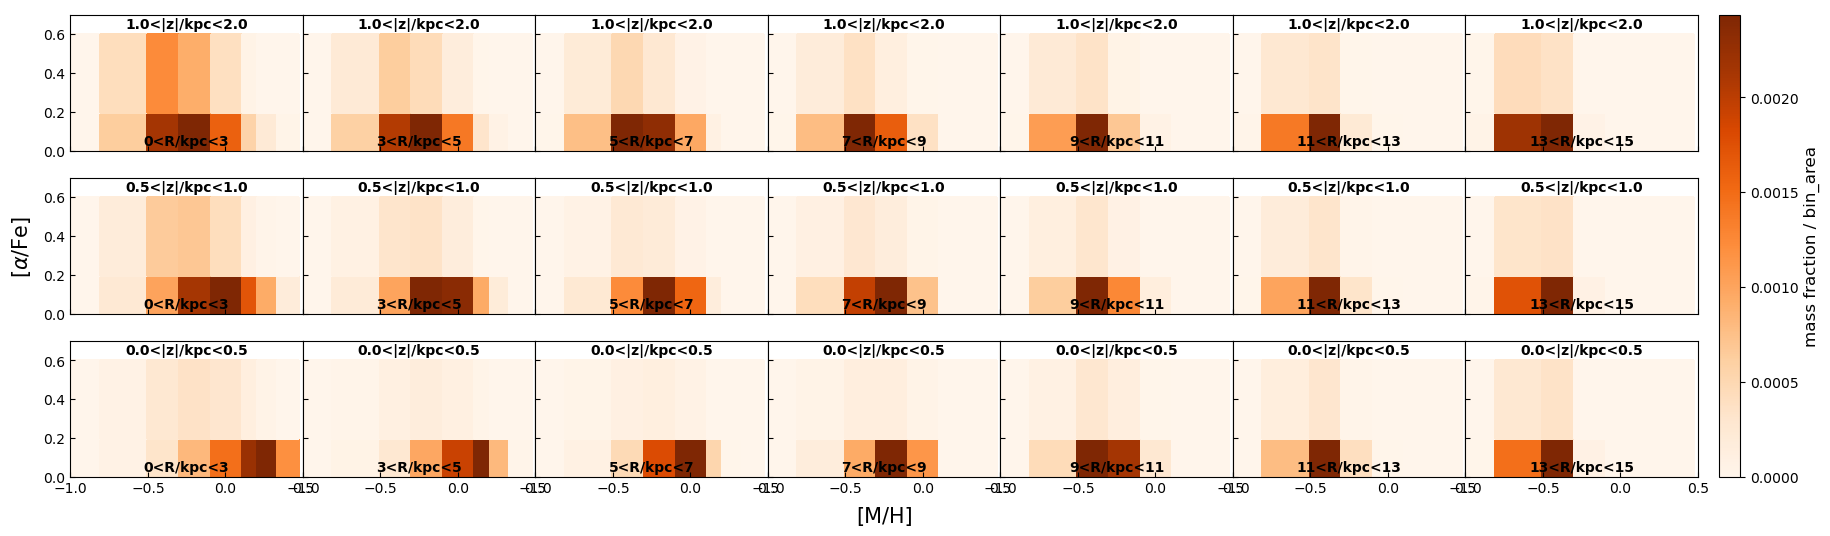

In [20]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# [M/H] - [alpha/Fe] distributions
if ppxf_weights.reg_dim[2] > 1 and true_weights.reg_dim[2] > 1:
    d = 26500 # kpc
    rbin = np.array([0, 3, 5, 7, 9, 11, 13, 15])
    zbin = np.array([0, 0.5, 1, 2])

    fig_maprzhist, fit_results = gist_mass_fraction_plot.plot_mh_alpha_rz_hist(ppxf_weights.weights_values, true_weights.weights_values, rbin, zbin, d,
                                                                  ppxf_weights.reg_dim, true_weights.reg_dim, ppxf_weights.results_table,
                                                                  metal_grid=ppxf_weights.metal_grid_2d[0, :, 0], metal_grid_true=true_weights.metal_grid_2d[0, :, 0],
                                                                  fraction_type=fraction_type)
    fig_maprzhist.savefig(fig_path_run + '/alphafe_mh_rz_hist_' + cube_gist_run + '.pdf', dpi=500)

    fig_maprz = gist_mass_fraction_plot.plot_mh_alpha_rz(ppxf_weights.weights_values, rbin, zbin, d, ppxf_weights.results_table, reg_dim=ppxf_weights.reg_dim, \
                                                         metal_grid=ppxf_weights.metal_grid_2d[0, :, 0], alpha_grid=ppxf_weights.alpha_grid_2d[0, 0, :])
    fig_maprz.savefig(fig_path_run + '/alphafe_mh_rz_' + cube_gist_run + '.pdf', dpi=500)

    fig_maprz_true = gist_mass_fraction_plot.plot_mh_alpha_rz(true_weights.weights_values, rbin, zbin, d, ppxf_weights.results_table, reg_dim=true_weights.reg_dim, \
                                                              metal_grid=true_weights.metal_grid_2d[0, :, 0], alpha_grid=true_weights.alpha_grid_2d[0, 0, :])
    fig_maprz_true.savefig(fig_path_run + '/alphafe_mh_rz_true' + cube_gist_run + '.pdf', dpi=500)

In [21]:
print("\n==============================")
print(" PANEL-BY-PANEL RESULTS")
print("==============================")

for e in fit_results:
    print(f"z = {e['zbin'][0]}–{e['zbin'][1]} kpc,  R = {e['rbin'][0]}–{e['rbin'][1]} kpc,  α = {e['alpha']}")
    print(f"    μ    = {e['mu']:.4f}")
    print(f"    σ    = {e['sigma']:.4f}")
    print(f"    h₃   = {e['h3']:.4f}")
    print(f"    h₄   = {e['h4']:.4f}")
    print("--------------------------------")



 PANEL-BY-PANEL RESULTS
z = 0.0–0.5 kpc,  R = 0–3 kpc,  α = $\alpha=0.0$
    μ    = 0.1976
    σ    = 0.3365
    h₃   = -0.0781
    h₄   = -0.1370
--------------------------------
z = 0.0–0.5 kpc,  R = 0–3 kpc,  α = $\alpha=0.4$
    μ    = 0.1706
    σ    = 0.4176
    h₃   = 0.1178
    h₄   = 0.0548
--------------------------------
z = 0.5–1.0 kpc,  R = 0–3 kpc,  α = $\alpha=0.0$
    μ    = -0.1382
    σ    = 0.2058
    h₃   = 0.1011
    h₄   = 0.1645
--------------------------------
z = 0.5–1.0 kpc,  R = 0–3 kpc,  α = $\alpha=0.4$
    μ    = -0.1377
    σ    = 0.2015
    h₃   = 0.1379
    h₄   = 0.2126
--------------------------------
z = 1.0–2.0 kpc,  R = 0–3 kpc,  α = $\alpha=0.0$
    μ    = -0.2668
    σ    = 0.1954
    h₃   = 0.0210
    h₄   = 0.0420
--------------------------------
z = 1.0–2.0 kpc,  R = 0–3 kpc,  α = $\alpha=0.4$
    μ    = -0.2301
    σ    = 0.1902
    h₃   = -0.0239
    h₄   = 0.1111
--------------------------------
z = 0.0–0.5 kpc,  R = 3–5 kpc,  α = $\alpha=

In [22]:
mus    = [e["mu"] for e in fit_results if e["alpha"] == r"$\alpha=0.0$"]
sigmas = [e["sigma"] for e in fit_results if e["alpha"] == r"$\alpha=0.0$"]
h3s    = [e["h3"] for e in fit_results if e["alpha"] == r"$\alpha=0.0$"]

print("\n============= MEANS (μ) =============")
for i, m in enumerate(mus):
    print(f"Panel {i+1}: μ = {m:.4f}")

print("\n============= SIGMAS (σ) =============")
for i, s in enumerate(sigmas):
    print(f"Panel {i+1}: σ = {s:.4f}")

print("\n============= SKEWNESS (h₃) =============")
for i, h in enumerate(h3s):
    print(f"Panel {i+1}: h₃ = {h:.4f}")



============= MEANS (μ) =============
Panel 1: μ = 0.1976
Panel 2: μ = -0.1382
Panel 3: μ = -0.2668
Panel 4: μ = -0.0068
Panel 5: μ = -0.1519
Panel 6: μ = -0.2622
Panel 7: μ = -0.1119
Panel 8: μ = -0.1834
Panel 9: μ = -0.2465
Panel 10: μ = -0.1739
Panel 11: μ = -0.2643
Panel 12: μ = -0.3669
Panel 13: μ = -0.2985
Panel 14: μ = -0.4347
Panel 15: μ = -0.4622
Panel 16: μ = -0.4672
Panel 17: μ = -0.4873
Panel 18: μ = -0.4934
Panel 19: μ = -0.5124
Panel 20: μ = -0.5220
Panel 21: μ = -0.5085

============= SIGMAS (σ) =============
Panel 1: σ = 0.3365
Panel 2: σ = 0.2058
Panel 3: σ = 0.1954
Panel 4: σ = 0.2113
Panel 5: σ = 0.1698
Panel 6: σ = 0.2129
Panel 7: σ = 0.1802
Panel 8: σ = 0.1690
Panel 9: σ = 0.2037
Panel 10: σ = 0.1508
Panel 11: σ = 0.1852
Panel 12: σ = 0.2233
Panel 13: σ = 0.1953
Panel 14: σ = 0.1809
Panel 15: σ = 0.2337
Panel 16: σ = 0.1630
Panel 17: σ = 0.1824
Panel 18: σ = 0.1501
Panel 19: σ = 0.1572
Panel 20: σ = 0.1497
Panel 21: σ = 0.2609

============= SKEWNESS (h₃) ========

In [23]:
# === FILTER ONLY ALPHA = 0.0 PANELS ===
blue_results = [e for e in fit_results if e["alpha"] == r'$\alpha=0.0$']

# Storage lists
mean_list   = []   # (z_low, z_high, r_low, r_high, μ)
sigma_list  = []   # (z_low, z_high, r_low, r_high, σ)
skew_list   = []   # (z_low, z_high, r_low, r_high, h3)

for e in blue_results:
    # Extract bins
    z_low, z_high = e["zbin"]
    r_low, r_high = e["rbin"]

    # Append μ, σ, h3 with associated z and r ranges
    mean_list.append( (z_low, z_high, r_low, r_high, e["mu"]) )
    sigma_list.append( (z_low, z_high, r_low, r_high, e["sigma"]) )
    skew_list.append( (z_low, z_high, r_low, r_high, e["h3"]) )

# === PRETTY PRINTING SECTION ===

print("\n================ MEANS (μ) FOR ALPHA = 0.0 ================")
for z1, z2, r1, r2, m in mean_list:
    print(f"z = {z1}–{z2} kpc,   R = {r1}–{r2} kpc   →   μ = {m:.4f}")

print("\n================ SIGMAS (σ) FOR ALPHA = 0.0 ================")
for z1, z2, r1, r2, s in sigma_list:
    print(f"z = {z1}–{z2} kpc,   R = {r1}–{r2} kpc   →   σ = {s:.4f}")

print("\n================ SKEWNESS (h3) FOR ALPHA = 0.0 ================")
for z1, z2, r1, r2, h in skew_list:
    print(f"z = {z1}–{z2} kpc,   R = {r1}–{r2} kpc   →   h3 = {h:.4f}")



================ MEANS (μ) FOR ALPHA = 0.0 ================
z = 0.0–0.5 kpc,   R = 0–3 kpc   →   μ = 0.1976
z = 0.5–1.0 kpc,   R = 0–3 kpc   →   μ = -0.1382
z = 1.0–2.0 kpc,   R = 0–3 kpc   →   μ = -0.2668
z = 0.0–0.5 kpc,   R = 3–5 kpc   →   μ = -0.0068
z = 0.5–1.0 kpc,   R = 3–5 kpc   →   μ = -0.1519
z = 1.0–2.0 kpc,   R = 3–5 kpc   →   μ = -0.2622
z = 0.0–0.5 kpc,   R = 5–7 kpc   →   μ = -0.1119
z = 0.5–1.0 kpc,   R = 5–7 kpc   →   μ = -0.1834
z = 1.0–2.0 kpc,   R = 5–7 kpc   →   μ = -0.2465
z = 0.0–0.5 kpc,   R = 7–9 kpc   →   μ = -0.1739
z = 0.5–1.0 kpc,   R = 7–9 kpc   →   μ = -0.2643
z = 1.0–2.0 kpc,   R = 7–9 kpc   →   μ = -0.3669
z = 0.0–0.5 kpc,   R = 9–11 kpc   →   μ = -0.2985
z = 0.5–1.0 kpc,   R = 9–11 kpc   →   μ = -0.4347
z = 1.0–2.0 kpc,   R = 9–11 kpc   →   μ = -0.4622
z = 0.0–0.5 kpc,   R = 11–13 kpc   →   μ = -0.4672
z = 0.5–1.0 kpc,   R = 11–13 kpc   →   μ = -0.4873
z = 1.0–2.0 kpc,   R = 11–13 kpc   →   μ = -0.4934
z = 0.0–0.5 kpc,   R = 13–15 kpc   →   μ = -0.512

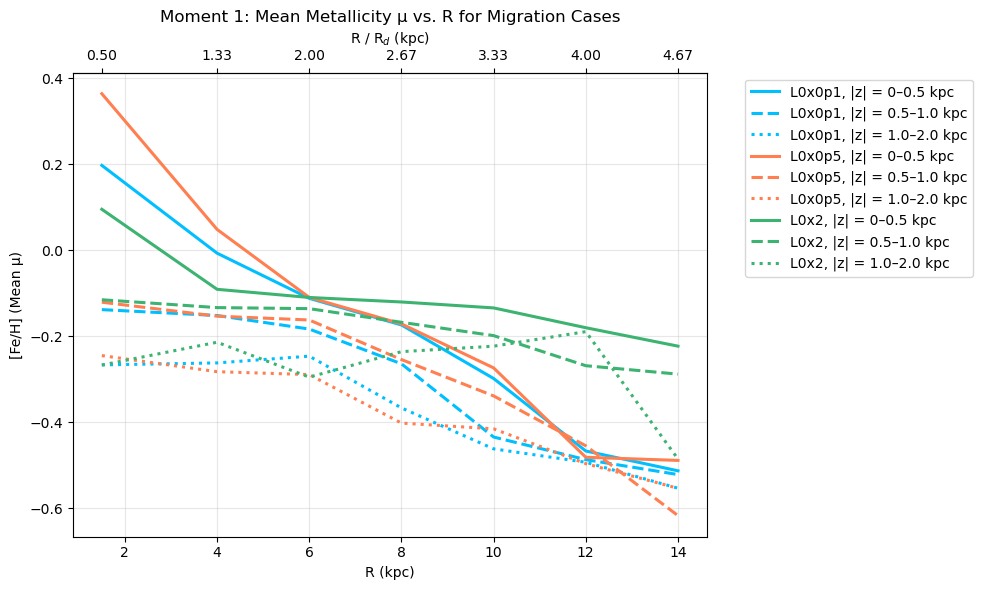

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# ------------------------------
# Moment 1: Mean μ values
# ------------------------------

L0x0p1 = {
    'z0': [0.1975, -0.0068, -0.1119, -0.1739, -0.2985, -0.4672, -0.5133],
    'z1': [-0.1382, -0.1519, -0.1834, -0.2643, -0.4347, -0.4873, -0.5220],
    'z2': [-0.2668, -0.2622, -0.2465, -0.3669, -0.4622, -0.4934, -0.5538]
}

L0x0p5 = {
    'z0': [0.3643, 0.0485, -0.1098, -0.1714, -0.2738, -0.4818, -0.4891],
    'z1': [-0.1209, -0.1534, -0.1623, -0.2544, -0.3390, -0.4551, -0.6176],
    'z2': [-0.2452, -0.2826, -0.2894, -0.4022, -0.4156, -0.4967, -0.5540]
}

L0x2 = {
    'z0': [0.0953, -0.0909, -0.1099, -0.1204, -0.1342, -0.1803, -0.2232],
    'z1': [-0.1152, -0.1335, -0.1359, -0.1677, -0.1987, -0.2687, -0.2883],
    'z2': [-0.2672, -0.2141, -0.2953, -0.2360, -0.2233, -0.1894, -0.4858]
}

cases = {'L0x0p1': L0x0p1, 'L0x0p5': L0x0p5, 'L0x2': L0x2}

# Colors (same across all moments)
colors = {
    'L0x0p1': 'deepskyblue',
    'L0x0p5': 'coral',
    'L0x2': 'mediumseagreen'
}

# Linestyles per |z| bin
linestyles = {'z0': '-', 'z1': '--', 'z2': ':'}

# Legend z labels
zlabels = {
    'z0': '|z| = 0–0.5 kpc',
    'z1': '|z| = 0.5–1.0 kpc',
    'z2': '|z| = 1.0–2.0 kpc'
}

# ------------------------------
# Plotting
# ------------------------------
plt.figure(figsize=(10, 6))

for cname, vals in cases.items():
    for zbin, mu_vals in vals.items():
        plt.plot(
            R, mu_vals,
            color=colors[cname],
            linestyle=linestyles[zbin],
            linewidth=2.2,         # ✨matching the sigma/skewness plots✨
            label=f"{cname}, {zlabels[zbin]}"
        )

# ------------------------------
# Add R/Rd top axis (Rd = 3 kpc)
# ------------------------------

def R_to_Rd(R):
    return R / 3.0

def Rd_to_R(Rd):
    return Rd * 3.0

ax = plt.gca()
ax_top = ax.secondary_xaxis('top', functions=(R_to_Rd, Rd_to_R))
ax_top.set_xlabel("R / R$_d$ (kpc)")

ax_top.set_xticks(R_to_Rd(R))
ax_top.set_xticklabels([f"{val:.2f}" for val in R_to_Rd(R)])

# ------------------------------
# Labels & title
# ------------------------------
plt.xlabel("R (kpc)")
plt.ylabel("[Fe/H] (Mean μ)")
plt.title("Moment 1: Mean Metallicity μ vs. R for Migration Cases")

plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


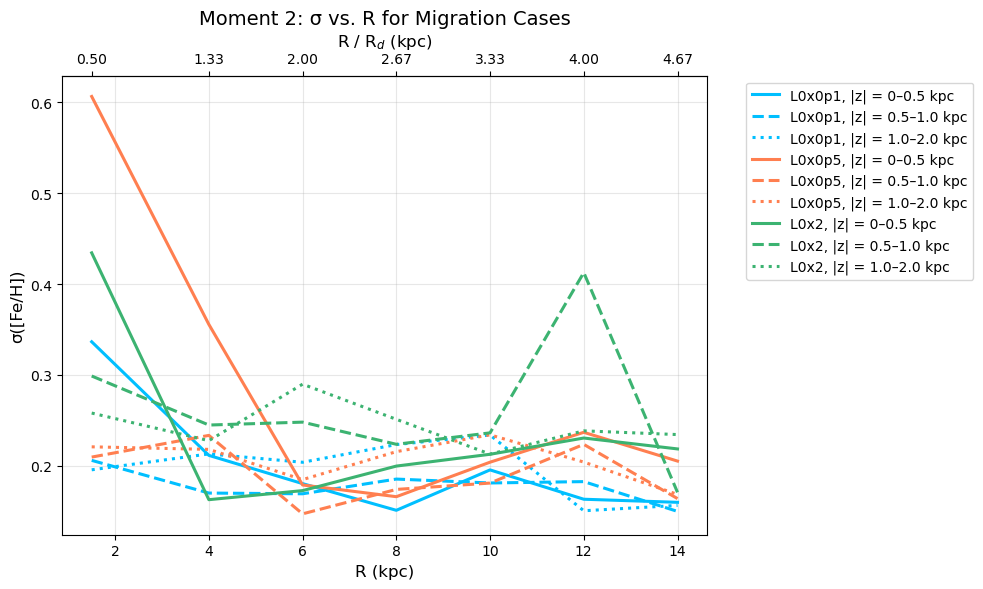

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# R midpoints (kpc)
# ------------------------------
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# ------------------------------
# Sigma values for each case & z-bin
# (ordered exactly from your data)
# ------------------------------

L0x0p1 = {
    'z0': [0.3364, 0.2113, 0.1802, 0.1508, 0.1953, 0.1630, 0.1596],
    'z1': [0.2058, 0.1698, 0.1690, 0.1852, 0.1809, 0.1824, 0.1496],
    'z2': [0.1954, 0.2129, 0.2037, 0.2232, 0.2337, 0.1503, 0.1562]
}

L0x0p5 = {
    'z0': [0.6065, 0.3555, 0.1787, 0.1658, 0.2038, 0.2367, 0.2050],
    'z1': [0.2094, 0.2333, 0.1469, 0.1738, 0.1808, 0.2234, 0.1637],
    'z2': [0.2207, 0.2179, 0.1846, 0.2154, 0.2339, 0.2039, 0.1683]
}

L0x2 = {
    'z0': [0.4343, 0.1625, 0.1725, 0.1995, 0.2125, 0.2304, 0.2184],
    'z1': [0.2987, 0.2447, 0.2479, 0.2235, 0.2361, 0.4126, 0.1706],
    'z2': [0.2579, 0.2275, 0.2897, 0.2510, 0.2127, 0.2383, 0.2342]
}

cases = {'L0x0p1': L0x0p1, 'L0x0p5': L0x0p5, 'L0x2': L0x2}

# Pretty aesthetic colors (publication quality)
colors = {
    'L0x0p1': 'deepskyblue',
    'L0x0p5': 'coral',
    'L0x2': 'mediumseagreen'
}

# Linestyles for z-bins
linestyles = {
    'z0': '-',       # solid
    'z1': '--',      # dashed
    'z2': ':'        # dotted
}

# Labels for legend
zlabels = {
    'z0': '|z| = 0–0.5 kpc',
    'z1': '|z| = 0.5–1.0 kpc',
    'z2': '|z| = 1.0–2.0 kpc'
}

# ------------------------------
# Plotting
# ------------------------------
plt.figure(figsize=(10, 6))

for cname, vals in cases.items():
    for zbin, sigma in vals.items():
        plt.plot(
            R, sigma,
            color=colors[cname],
            linestyle=linestyles[zbin],
            linewidth=2.2,
            label=f"{cname}, {zlabels[zbin]}"
        )

# ------------------------------
# Secondary top axis: R/Rd (Rd = 3 kpc)
# ------------------------------

def R_to_Rd(R):
    return R / 3.0

def Rd_to_R(Rd):
    return Rd * 3.0

ax = plt.gca()
ax_top = ax.secondary_xaxis('top', functions=(R_to_Rd, Rd_to_R))
ax_top.set_xlabel("R / R$_d$ (kpc)", fontsize=12)

# Use the same tick positions as R midpoints
ax_top.set_xticks(R_to_Rd(R))
ax_top.set_xticklabels([f"{val:.2f}" for val in R_to_Rd(R)], fontsize=10)

# ------------------------------
# Axes Labels
# ------------------------------
plt.xlabel("R (kpc)", fontsize=12)
plt.ylabel("σ([Fe/H])", fontsize=12)
plt.title("Moment 2: σ vs. R for Migration Cases", fontsize=14)

# ------------------------------
# Legend + Grid
# ------------------------------
plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


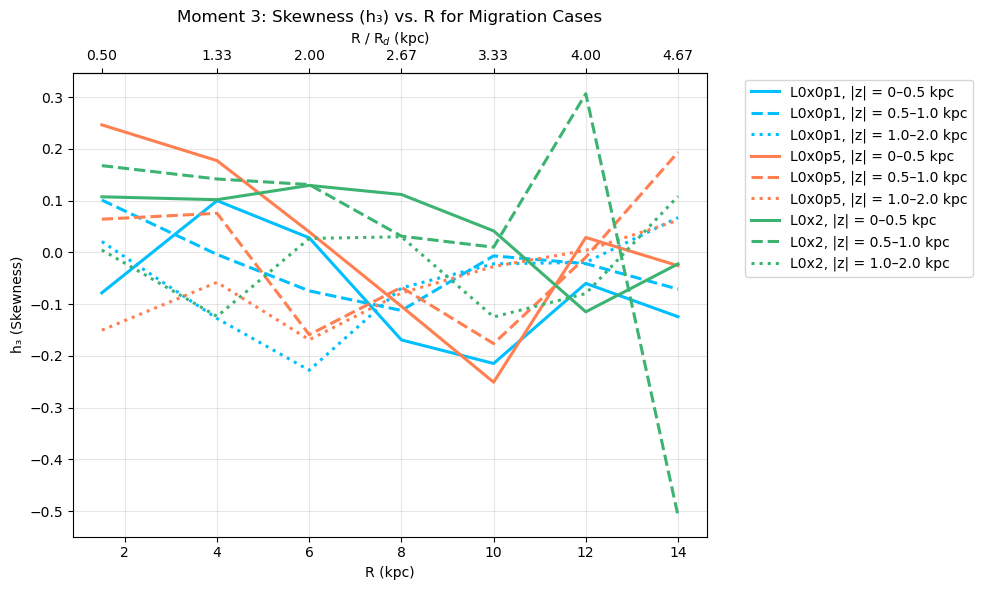

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# R midpoints
R = np.array([1.5, 4, 6, 8, 10, 12, 14])

# ------------------------------
# Moment 3: Skewness h3 values
# ------------------------------

L0x0p1 = {
    'z0': [-0.0782, 0.0999, 0.0281, -0.1692, -0.2147, -0.0600, -0.1243],
    'z1': [0.1011, -0.0041, -0.0744, -0.1123, -0.0068, -0.0218, -0.0710],
    'z2': [0.0210, -0.1277, -0.2278, -0.0687, -0.0222, -0.0194, 0.0673]
}

L0x0p5 = {
    'z0': [0.2464, 0.1772, 0.0396, -0.1042, -0.2509, 0.0288, -0.0258],
    'z1': [0.0641, 0.0755, -0.1591, -0.0675, -0.1763, -0.0094, 0.1936],
    'z2': [-0.1503, -0.0579, -0.1689, -0.0785, -0.0274, 0.0039, 0.0619]
}

L0x2 = {
    'z0': [0.1074, 0.1018, 0.1294, 0.1118, 0.0415, -0.1149, -0.0223],
    'z1': [0.1676, 0.1418, 0.1310, 0.0313, 0.0100, 0.3066, -0.5087],
    'z2': [0.0047, -0.1237, 0.0269, 0.0302, -0.1248, -0.0796, 0.1084]
}

cases = {'L0x0p1': L0x0p1, 'L0x0p5': L0x0p5, 'L0x2': L0x2}

# Colors (same as sigma plot)
colors = {
    'L0x0p1': 'deepskyblue',
    'L0x0p5': 'coral',
    'L0x2': 'mediumseagreen'
}

# Linestyles
linestyles = {'z0': '-', 'z1': '--', 'z2': ':'}

# Legend z-bin labels
zlabels = {
    'z0': '|z| = 0–0.5 kpc',
    'z1': '|z| = 0.5–1.0 kpc',
    'z2': '|z| = 1.0–2.0 kpc'
}

# ------------------------------
# Plotting
# ------------------------------
plt.figure(figsize=(10, 6))

for cname, vals in cases.items():
    for zbin, h3 in vals.items():
        plt.plot(
            R, h3,
            color=colors[cname],
            linestyle=linestyles[zbin],
            linewidth=2.2,
            label=f"{cname}, {zlabels[zbin]}"
        )

# ------------------------------
# Add R/Rd top axis (Rd=3 kpc)
# ------------------------------

def R_to_Rd(R):
    return R / 3.0

def Rd_to_R(Rd):
    return Rd * 3.0

ax = plt.gca()
ax_top = ax.secondary_xaxis('top', functions=(R_to_Rd, Rd_to_R))
ax_top.set_xlabel("R / R$_d$ (kpc)")

ax_top.set_xticks(R_to_Rd(R))
ax_top.set_xticklabels([f"{val:.2f}" for val in R_to_Rd(R)])

# ------------------------------
# Labels & Title
# ------------------------------
plt.xlabel("R (kpc)")
plt.ylabel("h₃ (Skewness)")
plt.title("Moment 3: Skewness (h₃) vs. R for Migration Cases")

plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()
